In [1]:
import pandas as pd 
df=pd.read_csv('https://raw.githubusercontent.com/debadrita1517/Comparing-the-Trending-Search-Engines/main/dataset.csv',parse_dates=['Month'],index_col ='Month')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 202 entries, 2004-01-01 to 2020-10-01
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Firefox            202 non-null    int64
 1   Safari             202 non-null    int64
 2   Google Chrome      202 non-null    int64
 3   Internet Explorer  202 non-null    int64
 4   Opera              202 non-null    int64
dtypes: int64(5)
memory usage: 9.5 KB


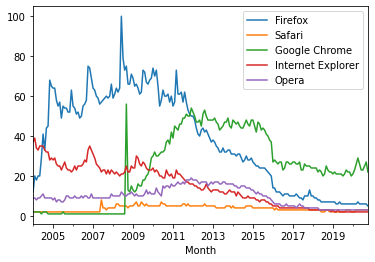

In [2]:
df.plot()

In [4]:
df.head(10)

,Firefox,Safari,Google Chrome,Internet Explorer,Opera
Month,,,,,
2004-01-01,12,2,2,37,9
2004-02-01,20,2,2,39,9
2004-03-01,18,2,2,34,8
2004-04-01,20,2,2,33,9
2004-05-01,20,2,2,35,9
2004-06-01,29,2,1,35,10
2004-07-01,41,2,2,35,11
2004-08-01,33,2,2,33,9
2004-09-01,44,2,2,32,9


In [5]:
rolling_six=df.rolling(window=6).mean()
rolling_six.head(10)

,Firefox,Safari,Google Chrome,Internet Explorer,Opera
Month,,,,,
2004-01-01,NaN,NaN,NaN,NaN,NaN
2004-02-01,NaN,NaN,NaN,NaN,NaN
2004-03-01,NaN,NaN,NaN,NaN,NaN
2004-04-01,NaN,NaN,NaN,NaN,NaN
2004-05-01,NaN,NaN,NaN,NaN,NaN
2004-06-01,19.833333,2.0,1.833333,35.500000,9.000000
2004-07-01,24.666667,2.0,1.833333,35.166667,9.333333
2004-08-01,26.833333,2.0,1.833333,34.166667,9.333333
2004-09-01,31.166667,2.0,1.833333,33.833333,9.500000


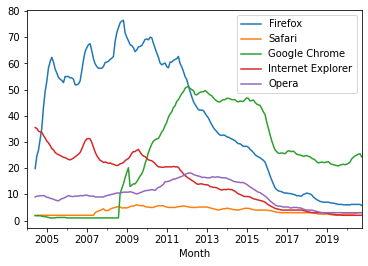

In [6]:
rolling_six.plot()

In [7]:
pct_change_quarterly=df.pct_change(3)*100
pct_change_quarterly

,Firefox,Safari,Google Chrome,Internet Explorer,Opera
Month,,,,,
2004-01-01,NaN,NaN,NaN,NaN,NaN
2004-02-01,NaN,NaN,NaN,NaN,NaN
2004-03-01,NaN,NaN,NaN,NaN,NaN
2004-04-01,66.666667,0.0,0.000000,-10.810811,0.0
2004-05-01,0.000000,0.0,0.000000,-10.256410,0.0
...,...,...,...,...,...
2020-06-01,0.000000,0.0,-11.538462,0.000000,0.0
2020-07-01,-14.285714,0.0,-20.689655,0.000000,0.0
2020-08-01,0.000000,0.0,-3.846154,0.000000,0.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd3ed9fff28>,
      dtype=object)

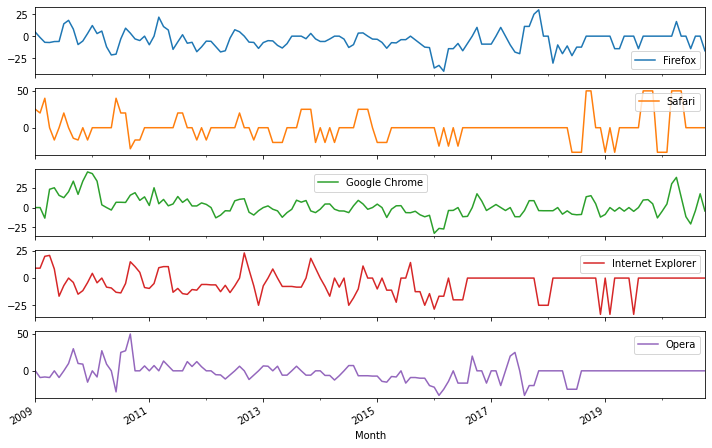

In [8]:
pct_change_quarterly=pct_change_quarterly.loc['2009':]
pct_change_quarterly.plot(subplots=True,figsize=(12,8))

In [15]:
chrome_trends=pd.DataFrame()
for year in ['2009','2012','2015','2018']:
    chrome_trend_per_year = df.loc[year,['Google Chrome']].reset_index(drop=True)
    chrome_trend_per_year.rename(columns={'Google Chrome':year},inplace=True)
    chrome_trends = pd.concat([chrome_trends,chrome_trend_per_year],axis=1)
    print(chrome_trends)

    2009
0     13
1     12
2     13
3     16
4     15
5     15
6     18
7     18
8     20
9     21
10    24
11    29
    2009  2012
0     13    52
1     12    50
2     13    47
3     16    47
4     15    48
5     15    45
6     18    51
7     18    53
8     20    50
9     21    48
10    24    48
11    29    48
    2009  2012  2015
0     13    52    48
1     12    50    45
2     13    47    42
3     16    47    47
4     15    48    46
5     15    45    43
6     18    51    44
7     18    53    43
8     20    50    41
9     21    48    40
10    24    48    38
11    29    48    37
    2009  2012  2015  2018
0     13    52    48    24
1     12    50    45    24
2     13    47    42    24
3     16    47    47    22
4     15    48    46    23
5     15    45    43    22
6     18    51    44    20
7     18    53    43    21
8     20    50    41    25
9     21    48    40    23
10    24    48    38    22
11    29    48    37    22


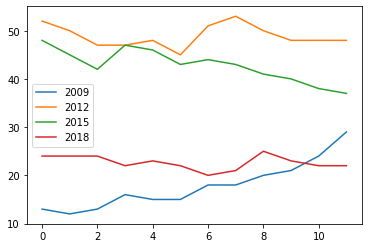

In [16]:
chrome_trends.plot()